# Meta Llama 3.3 70B Instruct with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.3 70B Instruct with prompt from 2/17/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v217
MODEL_ID = "us.meta.llama3-3-70b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 0
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:root:Completed: 2
INFO:root:Completed: 6
INFO:root:Completed: 7
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 5
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 11
INFO:root:Completed: 12
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 19
INFO:root:Completed: 18
INFO:root:Completed: 24
INFO:root:Completed: 21
INFO:root:Completed: 22
INFO:root:Completed: 20
INFO:root:Completed: 23
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 26
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 5s, sys: 3.64 s, total: 1min 9s
Wall time: 7min 36s


[{'0001.91306_cites_88061.txt': {'model': 'us.meta.llama3-3-70b-instruct-v1:0',
   'input_tokens': 2993,
   'output_tokens': 82,
   'prediction': 'yes',
   'confidence': 0.99,
   'rationale': "The passage explicitly states that the position taken in Texas v. White, 7 Wall. 700, 'must be regarded as overruled' in important particulars, indicating that the Acting Case has taken Explicit Negative Actions to overrule the Target Case.",
   'raw_results': '```json\n{\n  "overruled": "yes",\n  "confidence": 0.99,\n  "rationale": "The passage explicitly states that the position taken in Texas v. White, 7 Wall. 700, \'must be regarded as overruled\' in important particulars, indicating that the Acting Case has taken Explicit Negative Actions to overrule the Target Case."\n}\n```'}},
 {'0005.91306_cites_88693.txt': {'model': 'us.meta.llama3-3-70b-instruct-v1:0',
   'input_tokens': 2217,
   'output_tokens': 87,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage discusses a

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,2993,82,yes,0.99,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,2217,87,no,0.95,The passage discusses and references the Targe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,2216,93,no,0.95,"The passage discusses the Target Case, Texas v...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,2705,98,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,2244,93,no,0.95,The passage discusses and applies the rules es...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/3.llama/5.llama33_70B_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

2

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/3.llama/5.llama33_70B_v217_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.meta.llama3-3-70b-instruct-v1:0,2993,82,yes,0.99,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2705,98,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2244,93,no,0.95,The passage discusses and applies the rules es...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2216,93,no,0.95,"The passage discusses the Target Case, Texas v...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2217,87,no,0.95,The passage discusses and references the Targe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     867
yes    217
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

3606272

In [15]:
eval_df["output_tokens"].sum()

115983

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.90      0.94       935
         Yes       0.59      0.85      0.69       149

    accuracy                           0.90      1084
   macro avg       0.78      0.88      0.82      1084
weighted avg       0.92      0.90      0.90      1084



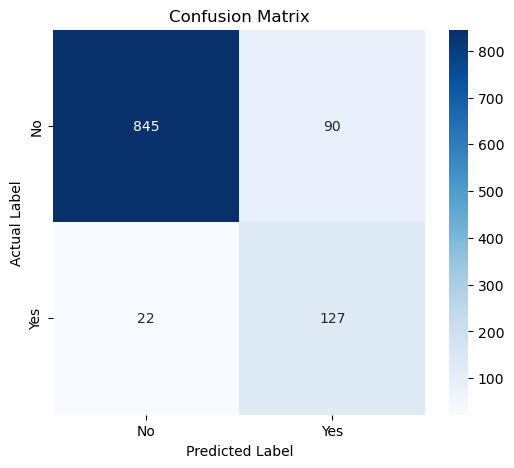

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.59
Recall: 0.85
F-score: 0.69
Specificity: 0.90
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 127
True negatives: 845
False positives: 90
False negatives: 22


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

90

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

22

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.meta.llama3-3-70b-instruct-v1:0,2993,82,yes,0.99,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2705,98,no,0.95,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2244,93,no,0.95,The passage discusses and applies the rules es...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2216,93,no,0.95,"The passage discusses the Target Case, Texas v...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.meta.llama3-3-70b-instruct-v1:0,2217,87,no,0.95,The passage discusses and references the Targe...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [23]:
eval_df.to_csv("predictions/3.llama/5.llama33_70B_v217_prompt_eval.csv", index=False)